<a href="https://colab.research.google.com/github/nataliasbsg/Red-de-clasificacion-de-animales/blob/main/TFM_Familias_Comparacion_de_Redes_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

Se importan todas las librerías necesarias para realizar la red de clasificación de animales. En este caso se trabajará con librerías para trabajar con las imágenes y TensorFlow para las redes.

In [1]:
# Importación de archivos desde drive
from google.colab import drive

# Tratamiento de imágenes
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
from PIL import Image

# Librerías para la red
import tensorflow as tf
import tensorflow_datasets as tensorflow_datasets
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Interacción con ejemplos en URLs
import requests
from io import BytesIO

from datetime import datetime


# Lectura de imágenes desde Drive
Se accede a las imagenes contenidas en Drive. En este caso hay tres niveles de carpetas:
1. Base de Datos general. Una sola carpeta que contiene todas las familias de animales que se quieren estudiar. Por ejemplo: "Base de datos de animales".
2. Conjunto de carpetas de familias de animales que a su vez contienen las carpetas de especies animales de la misma familia (categories). Por ejemplo:  dentro de "Base de datos de animales" encontraríamos "Cánidos" y "Felinos".
3. Conjunto de carpetas de especies animales (subcategories). Contienen las imagenes con las que se va a trabajar. Por ejemplo: dentro de "Felinos" encontraríamos "Linces" y "Gatos".


Se estudiará la pertenencia a las familias de cada imagen y para ello se numerará la cantidad de imágenes de cada familia (no de cada especie) y se hará una copia de las imágenes clasificadas en la máquina virtual.

En este caso las familias y las especies de cada una son las siguientes:
0. Cánidos: zorros.
1. Cérvidos: ciervos y gamos.
2. Felinos: gatos y linces.
3. Herpéstidos: meloncillos.
4. Lepóridos: conejos y liebres.
5. Mustélidos: tejones.
6. Suidos: jabalíes.
7. Úrsidos: osos.
8. Vivérridos: ginetas.

In [2]:
# Se accede a drive y se piden los permisos al usuario para trabajar en su cuenta
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dirección de la carpeta contenedora con la que se quiere trabajar
dir_train = '../content/drive/MyDrive/Colab Notebooks/BD_Familia' # path to directory with the images

# Se leen las carpetas contenidas en la direccion anterior y se ordenan y guardan en categories
categories = sorted(os.listdir(dir_train))
print('Las categorias de familias animales son:', categories)
categories_folders = [os.path.join(dir_train, categorie) for categorie in categories]

Las categorias de familias animales son: ['Cánidos', 'Cérvidos', 'Felinos', 'Herpéstidos', 'Lepóridos', 'Mustélidos', 'Suidos', 'Úrsidos', 'Vivérridos']


categories = ['Cánidos', 'Cérvidos', 'Felinos', 'Herpéstidos', 'Lepóridos', 'Mustélidos', 'Suidos', 'Úrsidos', 'Vivérridos']

subcategories = [['Zorros'], ['Ciervos', 'Gamos], ['Gatos', 'Linces'], ['Meloncillo'], ['Conejos', 'Liebres'], ['Tejones'], ['Jabalíes]', ['Osos'], ['Gineta']]


In [5]:
# Se inicializan variables 
num_images = [] # Guardara el numero de imagenes de cada categoria
subcategories = [] # Guardara las subcategorias de cada categoria (subcarpetas)

for categorie in categories:
  num_images_sub = 0
  # Se leen las subcarpetas de las carpetas (las especies de las familias)
  subcategories.append(sorted(os.listdir('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}'.format(categorie))))

  try:
    # Se crean directorios en la maquina virtual
    os.makedirs("dataset/{}".format(categorie))
    os.makedirs("test/{}".format(categorie))
  except:
    pass

  for subcategorie in subcategories[categories.index(categorie)]:
    num_images_sub = num_images_sub + len(os.listdir('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie)))

  # Se guarda el numero de imagenes de cada categoria (familia)
  num_images.append(num_images_sub)

print('El numero de imagenes de cada categoria es:', num_images)

# Se establece un limite con la carpeta con el menor numero de imagenes 
limit_image = min(num_images)
print('Se utilizarán', limit_image, 'imagenes de cada categoria')


El numero de imagenes de cada categoria es: [2656, 2572, 4139, 2069, 3764, 5608, 1879, 1811, 1821]
Se utilizarán 1811 imagenes de cada categoria


In [8]:
# Se limita el numero de imagenes para equilibrar las clases
for i, categorie in enumerate(categories):
  for subcategorie in subcategories[i]:
    carpeta_fuente = '/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie)
    carpeta_destino = '/content/dataset/{}'.format(categorie)
    carpeta_test = '/content/test/{}'.format(categorie)
    imagenes = [img for j, img in enumerate(os.listdir(carpeta_fuente)) if j<limit_image/len(subcategories[i])]
    imagenes, img_test = train_test_split(imagenes, test_size = 0.01, shuffle = True)
    print('El numero de imagenes guardadas para test de la subcategoria', subcategorie, 'es', len(img_test))
    for nombreimg in imagenes:
      path = os.path.join('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie), nombreimg)
      shutil.copy(path, carpeta_destino + '/' + nombreimg)

    # Se guardan parte de las imágenes para los test finales
    for nombreimg in img_test:
      path = os.path.join('/content/drive/MyDrive/Colab Notebooks/BD_Familia/{}/{}'.format(categorie, subcategorie), nombreimg)
      shutil.copy(path, carpeta_test + '/' + nombreimg)

El numero de imagenes guardadas para test de la subcategoria Zorro es 19
El numero de imagenes guardadas para test de la subcategoria Ciervos es 10
El numero de imagenes guardadas para test de la subcategoria Gamos es 10
El numero de imagenes guardadas para test de la subcategoria Gato montes es 10
El numero de imagenes guardadas para test de la subcategoria Lince ibérico es 10
El numero de imagenes guardadas para test de la subcategoria Meloncillo es 19
El numero de imagenes guardadas para test de la subcategoria Conejo es 10
El numero de imagenes guardadas para test de la subcategoria Liporidae es 10
El numero de imagenes guardadas para test de la subcategoria Tejón es 19
El numero de imagenes guardadas para test de la subcategoria Jabalíes es 19
El numero de imagenes guardadas para test de la subcategoria Osos es 19
El numero de imagenes guardadas para test de la subcategoria Gineta es 19


Found 12895 images belonging to 9 classes.
Found 3220 images belonging to 9 classes.


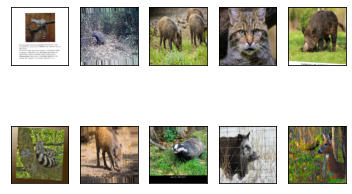

In [9]:
# Se crea el dataset generador para aumenar el numero de imagenes con las que se trabaja
datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 5,
    zoom_range = [0.75, 1.25],
    horizontal_flip=True,
    validation_split = 0.2 #20% para pruebas
)

# Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

# Se imprimen 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


# Entrenamiento de red

Debido a que el número de imagenes de animales el limitado una buena opción es entrenar una red que ya haya sido entrenada. En Tensor Flow Hub (https://tfhub.dev/) se encuentran muchas opciones de redes ya entrenadas. En nuestro caso hemos escogido una red de clasificación multiclase para reentrenarla con nuestras imágenes.

In [10]:
class Netmodel:
  def __init__(self, url, epocas, categorias, train_data, valid_data, img_size):
    self.epocas = epocas
    self.train_data = train_data
    self.valid_data = valid_data
    self.img_size = img_size

    # Se escoge una red de clasificación multiclase para reentrenarla con nuestros datos
    mobilenetv2 = hub.KerasLayer(url, input_shape=(img_size,img_size,3))

    # Se congela el modelo descargado
    mobilenetv2.trainable = False

    self.modelo = tf.keras.Sequential([
        mobilenetv2,
        tf.keras.layers.Dense(len(categories), activation='softmax')
    ])

    self.modelo.summary()

  def compile_model(self):
    # Se compila el modelo
    self.modelo.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

  def train_model(self):
    # Se reentrena la red
    t0 = datetime.now()
    self.historial = self.modelo.fit(
        data_gen_entrenamiento, epochs=self.epocas, batch_size=32,
        validation_data=data_gen_pruebas
    )
    t1 = datetime.now()
    print('El tiempo de entrenamiento de la red ha sido:', str(t1-t0))

  def grafic_model(self):
    # Se muestran los resultados con graficas de precisión
    acc = self.historial.history['accuracy']
    val_acc = self.historial.history['val_accuracy']

    loss = self.historial.history['loss']
    val_loss = self.historial.history['val_loss']

    rango_epocas = range(self.epocas)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
    plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
    plt.legend(loc='lower right')
    plt.title('Precisión de entrenamiento y pruebas')

    plt.subplot(1,2,2)
    plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
    plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
    plt.legend(loc='upper right')
    plt.title('Pérdida de entrenamiento y pruebas')
    plt.show()

In [11]:
EPOCAS = 5

# Mobilenet V3
cropnet/classifier/cassava_disease_V1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 9)                 9018      
                                                                 
Total params: 5,517,731
Trainable params: 9,018
Non-trainable params: 5,508,713
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8779

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 306s 724ms/step - loss: 0.3948 - accuracy: 0.8779 - val_loss: 0.2637 - val_accuracy: 0.9205
Epoch 2/5
403/403 [==============================] - 271s 673ms/step - loss: 0.1982 - accuracy: 0.9374 - val_loss: 0.2228 - val_accuracy: 0.9314
Epoch 3/5
403/403 [==============================] - 268s 666ms/step - loss: 0.1751 - accuracy: 0.9456 - val_loss: 0.2295 - val_accuracy: 0.9357
Epoch 4/5
403/403 [==============================] - 268s 664ms/step - loss: 0.1561 - accuracy: 0.9504 - val_loss: 0.2266 - val_accuracy: 0.9314
Epoch 5/5
403/403 [==============================] - 269s 667ms/step - loss: 0.1461 - accuracy: 0.9546 - val_loss: 0.2426 - val_accuracy: 0.9283
El tiempo de entrenamiento de la red ha sido: 0:23:55.772800


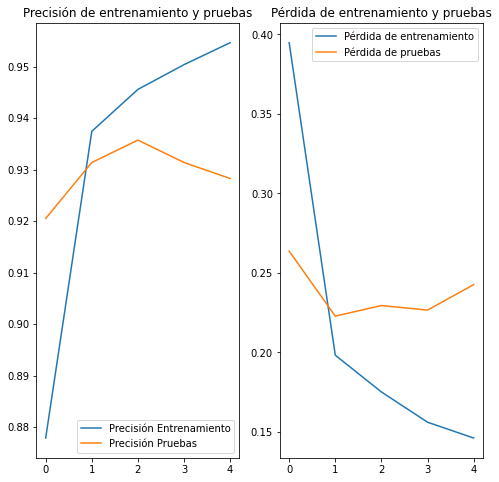

In [15]:
modelo = Netmodel(url="https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 6)                 4234118   
                                                                 
 dense_2 (Dense)             (None, 9)                 63        
                                                                 
Total params: 4,234,181
Trainable params: 63
Non-trainable params: 4,234,118
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 2.2126 - accuracy: 0.1116

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


403/403 [==============================] - 633s 2s/step - loss: 2.2126 - accuracy: 0.1116 - val_loss: 2.1997 - val_accuracy: 0.1115
Epoch 2/5
403/403 [==============================] - 619s 2s/step - loss: 2.1985 - accuracy: 0.1079 - val_loss: 2.1974 - val_accuracy: 0.1112
Epoch 3/5
403/403 [==============================] - 621s 2s/step - loss: 2.1978 - accuracy: 0.1081 - val_loss: 2.1973 - val_accuracy: 0.1112
Epoch 4/5
403/403 [==============================] - 621s 2s/step - loss: 2.1976 - accuracy: 0.1065 - val_loss: 2.1972 - val_accuracy: 0.1112
Epoch 5/5
403/403 [==============================] - 620s 2s/step - loss: 2.1977 - accuracy: 0.1100 - val_loss: 2.1973 - val_accuracy: 0.1115
El tiempo de entrenamiento de la red ha sido: 0:51:55.289450


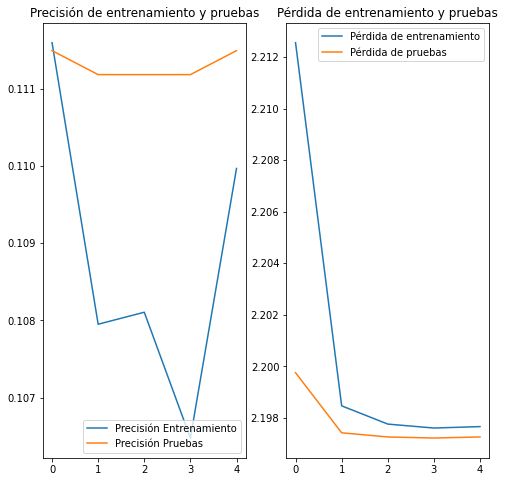

In [16]:
modelo = Netmodel(url="https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Mobilenet V2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 9)                 11529     
                                                                 
Total params: 2,269,513
Trainable params: 11,529
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 0.4250 - accuracy: 0.8716

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 275s 673ms/step - loss: 0.4250 - accuracy: 0.8716 - val_loss: 0.2554 - val_accuracy: 0.9183
Epoch 2/5
403/403 [==============================] - 271s 671ms/step - loss: 0.2216 - accuracy: 0.9302 - val_loss: 0.2452 - val_accuracy: 0.9230
Epoch 3/5
403/403 [==============================] - 271s 673ms/step - loss: 0.1883 - accuracy: 0.9415 - val_loss: 0.2309 - val_accuracy: 0.9298
Epoch 4/5
403/403 [==============================] - 269s 668ms/step - loss: 0.1741 - accuracy: 0.9439 - val_loss: 0.2289 - val_accuracy: 0.9283
Epoch 5/5
403/403 [==============================] - 270s 670ms/step - loss: 0.1529 - accuracy: 0.9523 - val_loss: 0.2289 - val_accuracy: 0.9273
El tiempo de entrenamiento de la red ha sido: 0:23:28.217483


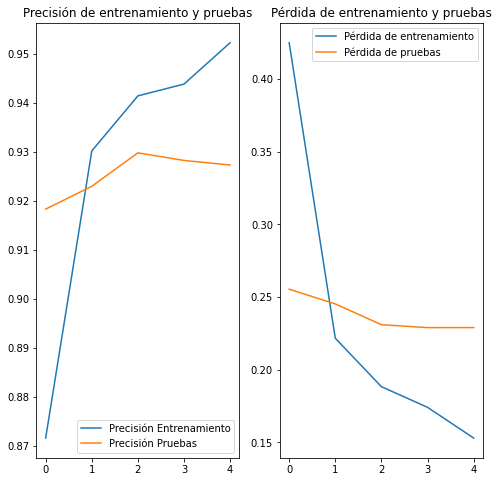

In [16]:
modelo = Netmodel(url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 965)               0         
                                                                 
 dense (Dense)               (None, 9)                 8694      
                                                                 
Total params: 8,694
Trainable params: 8,694
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 2.1516 - accuracy: 0.3910

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 792s 2s/step - loss: 2.1516 - accuracy: 0.3910 - val_loss: 2.1374 - val_accuracy: 0.4102
Epoch 2/5
403/403 [==============================] - 781s 2s/step - loss: 2.0739 - accuracy: 0.4843 - val_loss: 2.0862 - val_accuracy: 0.4199
Epoch 3/5
403/403 [==============================] - 740s 2s/step - loss: 2.0082 - accuracy: 0.4886 - val_loss: 2.0338 - val_accuracy: 0.4326
Epoch 4/5
403/403 [==============================] - 794s 2s/step - loss: 1.9502 - accuracy: 0.4988 - val_loss: 1.9914 - val_accuracy: 0.4382
Epoch 5/5
403/403 [==============================] - 757s 2s/step - loss: 1.8997 - accuracy: 0.5014 - val_loss: 1.9556 - val_accuracy: 0.4379
El tiempo de entrenamiento de la red ha sido: 1:05:10.249576


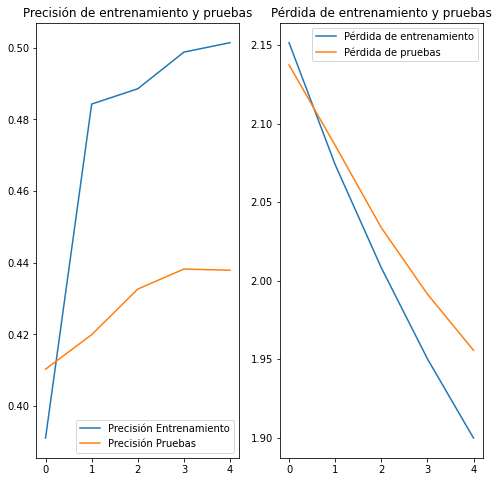

In [12]:
modelo = Netmodel(url="https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Inception-Resnet V2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              55875273  
                                                                 
 dense_3 (Dense)             (None, 9)                 9018      
                                                                 
Total params: 55,884,291
Trainable params: 9,018
Non-trainable params: 55,875,273
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 0.4064 - accuracy: 0.8872

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 3689s 9s/step - loss: 0.4064 - accuracy: 0.8872 - val_loss: 0.2747 - val_accuracy: 0.9242
Epoch 2/5
403/403 [==============================] - 3746s 9s/step - loss: 0.2516 - accuracy: 0.9258 - val_loss: 0.2430 - val_accuracy: 0.9366
Epoch 3/5
403/403 [==============================] - 3757s 9s/step - loss: 0.2242 - accuracy: 0.9326 - val_loss: 0.2570 - val_accuracy: 0.9366
Epoch 4/5
403/403 [==============================] - 3805s 9s/step - loss: 0.2155 - accuracy: 0.9343 - val_loss: 0.2543 - val_accuracy: 0.9394
Epoch 5/5
403/403 [==============================] - 3811s 9s/step - loss: 0.2112 - accuracy: 0.9373 - val_loss: 0.2283 - val_accuracy: 0.9404
El tiempo de entrenamiento de la red ha sido: 5:14:19.331171


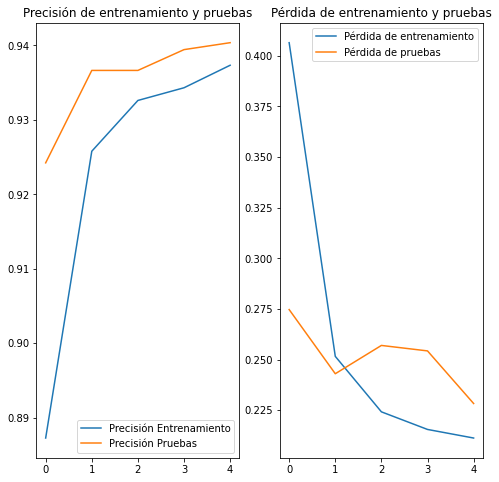

In [17]:
modelo = Netmodel(url="https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# VGG Style (CIFAR 10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 10)                7796426   
                                                                 
 dense_3 (Dense)             (None, 9)                 99        
                                                                 
Total params: 7,796,525
Trainable params: 99
Non-trainable params: 7,796,426
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 3.9870 - accuracy: 0.1332

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 320s 786ms/step - loss: 3.9870 - accuracy: 0.1332 - val_loss: 2.9920 - val_accuracy: 0.1366
Epoch 2/5
403/403 [==============================] - 313s 776ms/step - loss: 2.4576 - accuracy: 0.1918 - val_loss: 2.3560 - val_accuracy: 0.1618
Epoch 3/5
403/403 [==============================] - 313s 777ms/step - loss: 2.0753 - accuracy: 0.2476 - val_loss: 2.1713 - val_accuracy: 0.1807
Epoch 4/5
403/403 [==============================] - 312s 773ms/step - loss: 1.9780 - accuracy: 0.2725 - val_loss: 2.1225 - val_accuracy: 0.1857
Epoch 5/5
403/403 [==============================] - 310s 770ms/step - loss: 1.9549 - accuracy: 0.2792 - val_loss: 2.1033 - val_accuracy: 0.2056
El tiempo de entrenamiento de la red ha sido: 0:26:20.265149


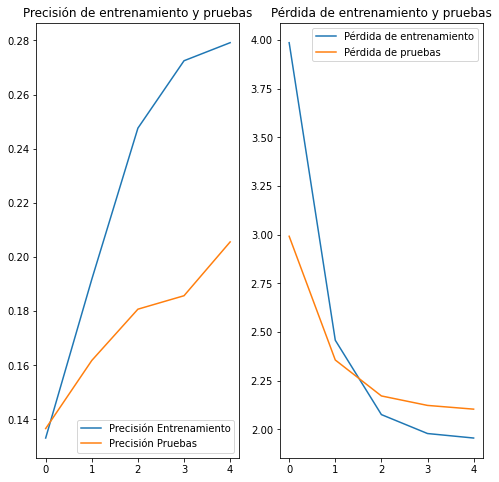

In [18]:
modelo = Netmodel(url="https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=32) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Swin Transformer (CIFAR 100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 100)               164052    
                                                                 
 dense_5 (Dense)             (None, 9)                 909       
                                                                 
Total params: 164,961
Trainable params: 909
Non-trainable params: 164,052
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 2.1777 - accuracy: 0.1883

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 265s 651ms/step - loss: 2.1777 - accuracy: 0.1883 - val_loss: 2.1719 - val_accuracy: 0.2102
Epoch 2/5
403/403 [==============================] - 262s 649ms/step - loss: 2.1400 - accuracy: 0.2812 - val_loss: 2.1517 - val_accuracy: 0.2245
Epoch 3/5
403/403 [==============================] - 263s 653ms/step - loss: 2.1092 - accuracy: 0.3050 - val_loss: 2.1253 - val_accuracy: 0.2447
Epoch 4/5
403/403 [==============================] - 262s 651ms/step - loss: 2.0817 - accuracy: 0.3184 - val_loss: 2.1126 - val_accuracy: 0.2537
Epoch 5/5
403/403 [==============================] - 262s 650ms/step - loss: 2.0554 - accuracy: 0.3226 - val_loss: 2.0970 - val_accuracy: 0.2571
El tiempo de entrenamiento de la red ha sido: 0:21:54.694668


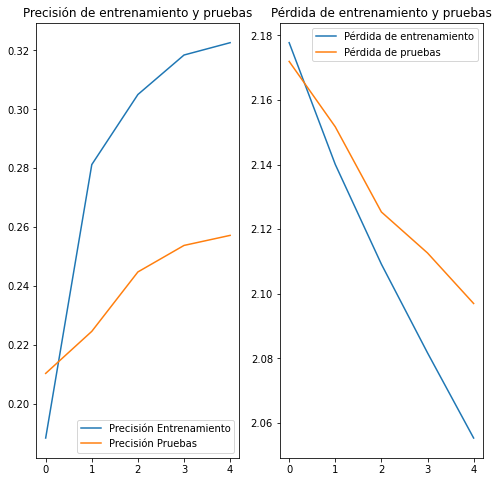

In [20]:
modelo = Netmodel(url="https://tfhub.dev/rishit-dagli/swin-transformer/1", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=32) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Inception V3

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 dense_6 (Dense)             (None, 9)                 9018      
                                                                 
Total params: 23,862,851
Trainable params: 9,018
Non-trainable params: 23,853,833
_________________________________________________________________
Epoch 1/5
403/403 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.8518

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


403/403 [==============================] - 287s 699ms/step - loss: 0.5166 - accuracy: 0.8518 - val_loss: 0.3596 - val_accuracy: 0.9047
Epoch 2/5
403/403 [==============================] - 278s 690ms/step - loss: 0.2981 - accuracy: 0.9083 - val_loss: 0.3159 - val_accuracy: 0.9146
Epoch 3/5
403/403 [==============================] - 277s 687ms/step - loss: 0.2677 - accuracy: 0.9163 - val_loss: 0.2999 - val_accuracy: 0.9143
Epoch 4/5
403/403 [==============================] - 276s 686ms/step - loss: 0.2528 - accuracy: 0.9226 - val_loss: 0.3350 - val_accuracy: 0.9137
Epoch 5/5
403/403 [==============================] - 276s 685ms/step - loss: 0.2484 - accuracy: 0.9233 - val_loss: 0.3470 - val_accuracy: 0.9118
El tiempo de entrenamiento de la red ha sido: 0:24:00.032992


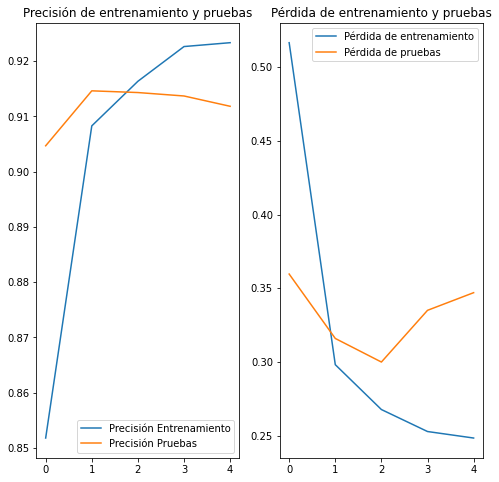

In [21]:
modelo = Netmodel(url="https://tfhub.dev/google/imagenet/inception_v3/classification/5", epocas=EPOCAS,categorias=categories, train_data=data_gen_entrenamiento, valid_data=data_gen_pruebas, img_size=224) 
modelo.compile_model()
modelo.train_model()
modelo.grafic_model()

# Conclusiones
Este bloque tiene el objetivo de elegir la red preentrenada más óptima para nuestro caso en concreto. Para ello, se han probado varias redes disponibles en TF hub con diferentes arquitecturas y entrenamientos.

Para saber el comportamiento inicial de cada red se han tomado tan solo 5 épocas y se ha tenido en cuenta la precisión y el tiempo que tarda en ejecutarse la red, ya que se pretende que la red sea fácilmente reentrenable en el caso de querer añadir más animales.

Estas son las conclusiones de cada red reentrenada:
1. Mobilenet V3:
  - "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5". 
Esta red presenta buenos resultados en un tiempo de entrenamiento aceptable.
  - "https://tfhub.dev/google/cropnet/classifier/cassava_disease_V1/2"
  Red entrenada con enfermedades de plantas. La red no se adapta a nuestras imágenes, no es válida.
2. Mobilenet V2:
  - "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4". 
  Esta red presenta buenos resultados en un tiempo de entrenamiento aceptable.
  - "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4". 
  Red entrenada con imágenes de pájaros. La precisión no alcanza el 50% por lo que se descarta.

3. Inception - Resnet:
  - "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5". Tarda demasiado tiempo en ejecutarse cada época (1 hora aproximadamente) por lo que se descarta.

4. VGG Style (CIFAR 10)
  - "https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1"
  Sus parámetros no se ajustan bien a nuestras imágenes y la precisión es insuficiente (no alcanza el 30%).

5. Swin Transformer (CIFAR 100)
  - "https://tfhub.dev/rishit-dagli/swin-transformer/1". 
  Sus parámetros no se ajustan bien a nuestras imágenes y la precisión es insuficiente (no alcanza el 35%).

6. Inception V3
  - "https://tfhub.dev/google/imagenet/inception_v3/classification/5". Esta red presenta buenos resultados en un tiempo de entrenamiento aceptable.

Analizando estos resultados se puede concluir que las redes que mejor se adaptan a nuestro caso de estudio son las que tienen arquitectura Mobilenet V3, Mobilenet V2 e Inception V3. Para la elección final de la red se realizará otro bloque similar a este, pero ejecutando simplemente las redes con una precisión mayor al 90% con más épocas.